# Scikit Learn ANN for Predicting Continuous Well Measurements

## Importing Libraries and Loading Data

In [557]:
import pandas as pd
import matplotlib.pyplot as plt

med_tutorial_scikit_learn_1.py

In [558]:
df = pd.read_csv('/workspaces/Petrophysics-Python-Series/Data_JA/Data_V2_Norm.CSV', 
                 usecols=['WELL', 'DEPTH','GR_norm', 'PEF', 'PHIA', 'PHIE', 'PHIN_norm', 'RHOB_norm', 'RoMS', 'RT', 'SwIrr', 'SwMS', 'VCL', 'VSH', 'Core_Kmax'])

In [559]:
df = df.dropna()

## Create Training, Testing and Validation Datasets

In [560]:
df['WELL'].unique()

array(['PozoS1', 'Pozo24', 'PozoS2', 'PozoN3'], dtype=object)

Our dataset should have 4 wells within it. We can confirm this by calling upon the `unique()` function

In [561]:
df

,WELL,DEPTH,GR_norm,PEF,PHIA,PHIE,PHIN_norm,RHOB_norm,RoMS,RT,SwIrr,SwMS,VCL,VSH,Core_Kmax
0,PozoS1,10066.8,60.8022,2.1984,0.1230,0.0756,0.1996,2.5736,14.7961,40.5701,0.6308,0.6308,0.5342,0.6170,0.0590
1,PozoS1,10068.3,92.7223,2.2292,0.1265,0.0588,0.2244,2.6027,12.0327,47.4945,0.8613,0.8613,0.9234,0.7878,0.0020
2,PozoS1,10075.3,104.3466,2.2938,0.1669,0.0464,0.2822,2.5648,8.4883,41.1670,1.0000,1.0000,1.0000,0.9280,0.0630
3,PozoS1,10078.3,80.2016,2.3082,0.1375,0.0626,0.2333,2.5812,12.0463,46.6735,0.7981,0.7981,0.7708,0.7713,0.0270
4,PozoS1,10079.8,72.6600,2.1763,0.1419,0.0989,0.2003,2.5124,16.3031,50.8823,0.4410,0.4410,0.6788,0.4705,11.5620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,PozoN3,10696.4,72.1748,2.0220,0.1527,0.1051,0.2098,2.4922,15.6050,100.6453,0.4049,0.4049,0.6729,0.4595,0.0310
173,PozoN3,10698.9,71.2071,2.0181,0.2234,0.2090,0.2321,2.2959,14.5759,391.2950,0.1166,0.1544,0.6611,0.0705,9621.9395
174,PozoN3,10699.9,74.7309,2.0179,0.2254,0.2184,0.2289,2.2840,14.7187,377.8987,0.1041,0.1745,0.7040,0.0286,1.4740
175,PozoN3,10701.4,58.8390,1.9610,0.2213,0.1849,0.2453,2.3244,13.8176,190.0288,0.1546,0.1929,0.5102,0.1931,2587.6570


As we are using measurements taken from multiple wells, one way to split our data into training and testing is to set aside a single well (blind test well) which will be used to see how our model performs on unseen data.

In [562]:
# Training Wells
training_wells = ['PozoS2', 'Pozo24', 'PozoN3']

# Test Well
test_well = ['PozoS1']

"Extract" the data from the main dataframe using the well lists above

In [563]:
train_val_df = df[df['WELL'].isin(training_wells)].copy()
test_df = df[df['WELL'].isin(test_well)].copy()

In [564]:
train_val_df.describe()

,DEPTH,GR_norm,PEF,PHIA,PHIE,PHIN_norm,RHOB_norm,RoMS,RT,SwIrr,SwMS,VCL,VSH,Core_Kmax
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,10586.026812,41.092822,2.030222,0.205267,0.175401,0.231021,2.353786,14.559022,491.357419,0.229179,0.357076,0.292586,0.217504,1446.116185
std,74.708765,23.020459,0.214514,0.036994,0.057465,0.025083,0.105503,2.544461,849.878928,0.198283,0.234438,0.268310,0.240584,2166.375438
min,10434.600000,12.091600,1.523400,0.126400,0.036400,0.172800,2.188600,0.724100,23.932100,0.053600,0.076600,0.000000,0.000000,0.000000
25%,10517.350000,22.460700,1.914325,0.176400,0.128250,0.215275,2.273725,13.224300,42.164225,0.098950,0.140400,0.066550,0.015725,1.861000
50%,10569.400000,36.489000,2.010500,0.209250,0.194550,0.233800,2.325000,14.110000,123.561900,0.138350,0.326350,0.237650,0.139800,276.000500
75%,10655.525000,52.622275,2.111450,0.235700,0.222525,0.250350,2.434650,15.847425,487.303650,0.299975,0.557325,0.434400,0.345150,2074.212325
max,10702.400000,115.433800,3.531800,0.277000,0.266700,0.296100,2.658900,20.411800,4667.658700,1.000000,1.000000,1.000000,1.000000,9621.939500


In [565]:
test_df.describe()

,DEPTH,GR_norm,PEF,PHIA,PHIE,PHIN_norm,RHOB_norm,RoMS,RT,SwIrr,SwMS,VCL,VSH,Core_Kmax
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,10107.710256,40.666838,2.038336,0.202551,0.176097,0.225508,2.353687,15.009182,269.087349,0.245295,0.308456,0.287754,0.208128,1912.355585
std,22.322655,25.613098,0.138086,0.037689,0.057761,0.025845,0.113631,2.306793,203.086424,0.246591,0.218871,0.307425,0.267480,3255.540369
min,10066.800000,14.801800,1.833800,0.123000,0.046400,0.182700,2.217500,8.488300,40.570100,0.081200,0.123900,0.000000,0.000000,0.002000
25%,10090.300000,21.756350,1.942250,0.192450,0.163550,0.207300,2.277000,13.665550,126.077900,0.102000,0.176000,0.058000,0.000000,72.516000
50%,10107.300000,28.944000,2.004400,0.210900,0.195800,0.224800,2.323900,14.858400,230.546100,0.136400,0.227700,0.145700,0.107700,595.562000
75%,10127.300000,51.986700,2.084150,0.230650,0.220100,0.237100,2.358800,16.317250,338.259550,0.198500,0.276950,0.426650,0.322700,1370.692500
max,10142.300000,104.346600,2.368000,0.250100,0.238000,0.283800,2.602700,19.648000,686.621700,1.000000,1.000000,1.000000,0.928000,12048.406300


## Proprocessing

## Implementing the Random Forest Model

In [566]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Selecting Training and Target Features

In [567]:
X = train_val_df[['GR_norm', 'PEF', 'PHIA', 'PHIE', 'PHIN_norm', 'RHOB_norm', 'RoMS', 'RT', 'SwIrr', 'SwMS', 'VCL', 'VSH']]
y = train_val_df['Core_Kmax']


Note that the name test used here is commonly used within machine learning. In this case the variables X_test and y_test are our validation data. In other words it is used to help tune our model. 

In [568]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Checking the shapes of X_train and X_test to make sure they have been split correctly.

### Applying Standard Scaler

In [569]:
scaler = StandardScaler()

In [570]:
X_train = scaler.fit_transform(X_train)

In [571]:
X_train

array([[-1.00165734, -0.01466964,  1.01395893, ..., -1.13930103,
        -1.04050755, -0.88222259],
       [-0.3866834 , -0.59313464,  0.48228085, ..., -0.98771336,
        -0.40054067, -0.56889695],
       [-0.9470167 , -0.11386083,  1.52336776, ..., -1.09227106,
        -0.98356814, -0.88222259],
       ...,
       [-0.69610218,  0.07685678,  0.34031446, ..., -0.93858383,
        -0.72252902, -0.47044763],
       [-0.9783346 , -1.71083903,  1.96596888, ..., -0.64674607,
        -1.01604766, -0.88222259],
       [-1.06152468, -0.1463234 , -0.11898859, ..., -0.10338195,
        -1.09624401, -0.88222259]])

In [572]:
X_val = scaler.transform(X_val)

In [573]:
X_val

array([[ 3.57124014e+00,  6.49009613e-01, -1.75856129e+00,
        -2.53089523e+00,  1.50970076e+00,  2.63796367e+00,
        -3.06205139e-01, -5.23078654e-01,  4.03147500e+00,
         2.72009590e+00,  2.91357350e+00,  3.39818236e+00],
       [-9.67058654e-01,  5.74694096e-02,  1.33407923e+00,
         1.25577951e+00,  8.26347043e-01, -1.21609048e+00,
        -9.62623337e-01,  6.43186844e-01, -7.78866779e-01,
        -1.06539679e+00, -1.00441919e+00, -8.82222589e-01],
       [ 3.70332701e-01,  1.26903244e-01,  2.59588467e-01,
        -3.66313783e-01,  1.03256621e+00,  1.10907139e-01,
        -6.47998087e-01, -5.77290273e-01, -4.72184543e-02,
         1.06060981e+00,  3.86987488e-01,  5.12761382e-01],
       [-4.50447266e-01, -6.65273689e-01,  1.19489649e+00,
         6.77483556e-01,  1.43287401e+00, -8.11839547e-01,
        -1.06492810e+00, -5.19508506e-01, -5.88834978e-01,
        -3.95555642e-02, -4.66702660e-01, -3.03511841e-01],
       [ 2.04667933e+00,  7.50455151e-01, -1.1684264

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### Building the Model

In [574]:
model = MLPRegressor(hidden_layer_sizes=(64, 64,64), 
                     activation="relu" ,
                     random_state=42, max_iter=2000)

In [575]:
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 64, 64), max_iter=2000, random_state=42)

In [576]:
y_pred = model.predict(X_val)

### Check the Prediction Results

In [577]:
mae = metrics.mean_absolute_error(y_val, y_pred)

In [578]:
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5 

In [579]:
rmse

8618.424869191185

In [580]:
r2 = metrics.r2_score(y_val, y_pred)
r2

-22.747550570550345

In [581]:
print(f"""
MAE: \t{mae:.2f}
RMSE: \t{rmse:.2f}
r2: \t{r2:.2f}
""")


MAE: 	2362.66
RMSE: 	8618.42
r2: 	-22.75



Simple metrics like above are a nice way to see how a model has performed, but you should always check the actual data. 

In the plot below, we are comparing the real data against the predicted data.

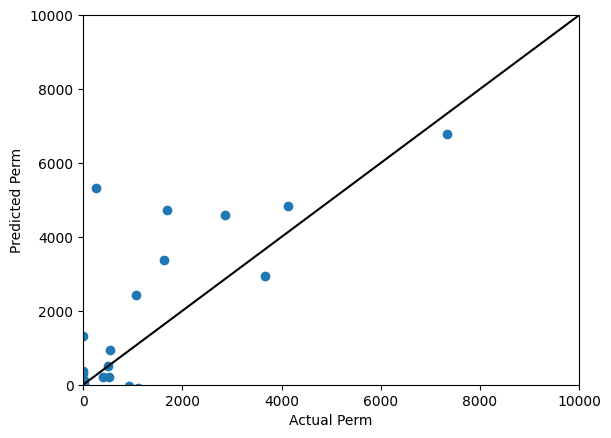

In [582]:
plt.scatter(y_val, y_pred)
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.ylabel('Predicted Perm')
plt.xlabel('Actual Perm')
plt.plot([0,10000], [0,10000], 'black') #1 to 1 line
plt.show()

## Test Well Prediction
Once the model has been fine tuned, we can apply it to our blind test well and see how it performs.

In [583]:
test_well_x = test_df[['GR_norm', 'PEF', 'PHIA', 'PHIE', 'PHIN_norm', 'RHOB_norm', 'RoMS', 'RT', 'SwIrr', 'SwMS', 'VCL', 'VSH']]

In [584]:
test_well_x = scaler.transform(test_well_x)

In [585]:
test_df['TEST_PERM'] = model.predict(test_well_x)

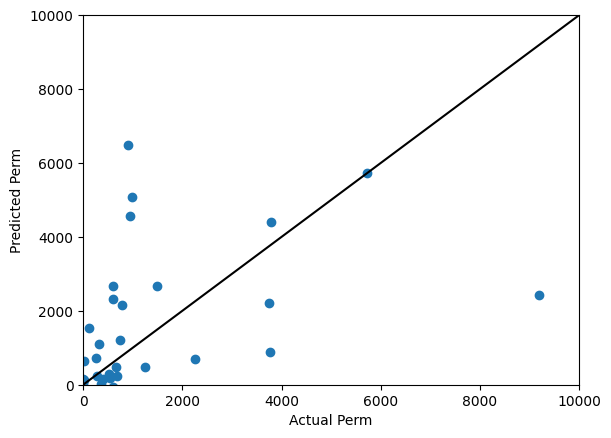

In [586]:
plt.scatter(test_df['Core_Kmax'], test_df['TEST_PERM'])
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.ylabel('Predicted Perm')
plt.xlabel('Actual Perm')
plt.plot([0,10000], [0,10000], 'black') #1 to 1 line
plt.show()

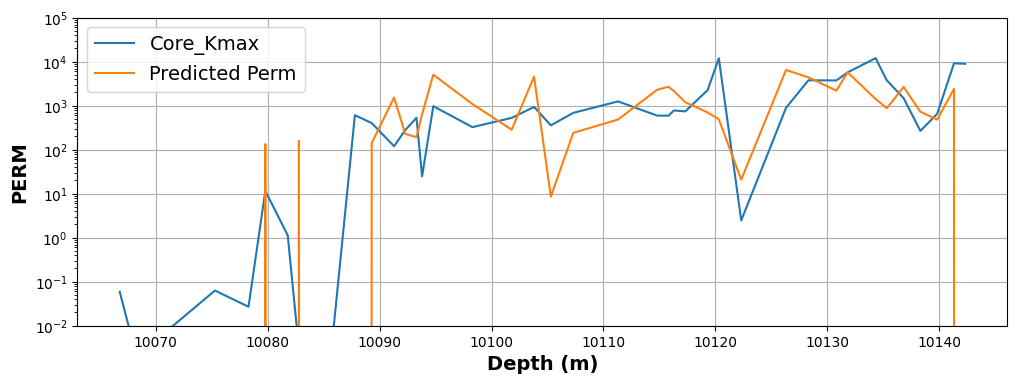

In [587]:
plt.figure(figsize=(12, 4))
plt.plot(test_df['DEPTH'], test_df['Core_Kmax'], label='Core_Kmax')
plt.plot(test_df['DEPTH'], test_df['TEST_PERM'], label='Predicted Perm')

plt.xlabel('Depth (m)', fontsize=14, fontweight='bold')
plt.ylabel('PERM', fontsize=14,fontweight='bold')
plt.yscale('log')
plt.ylim(0.01, 100000)
plt.legend(fontsize=14)
plt.grid()